<a href="https://colab.research.google.com/github/sksamimali2000/ML/blob/main/machine_learning_model_create_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

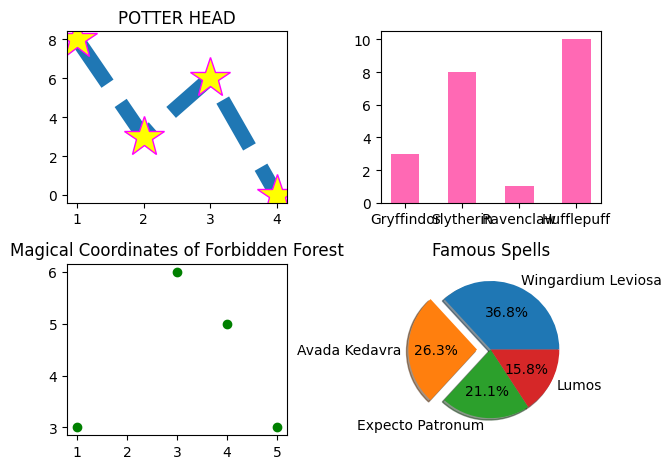

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)

# a) Line graph
x = [1, 2, 3, 4]
y = [8, 3, 6, 0]
axs[0, 0].plot(x, y, linestyle='--', linewidth=10.5, marker='*', markersize=30, markerfacecolor='yellow', markeredgecolor='magenta')
axs[0, 0].set_title("POTTER HEAD")

# b) Bar graph
classes = ['Gryffindor', 'Slytherin', 'Ravenclaw', 'Hufflepuff']
values = [3, 8, 1, 10]
axs[0, 1].bar(classes, values, color='hotpink', width=0.5)

# c) Scatter plot
points = [(1, 3), (3, 6), (4, 5), (5, 3)]
x, y = zip(*points)
axs[1, 0].scatter(x, y, color='green')
axs[1, 0].set_title("Magical Coordinates of Forbidden Forest")

# d) Pie chart
classes = ['Wingardium Leviosa', 'Avada Kedavra', 'Expecto Patronum', 'Lumos']
values = [35, 25, 20, 15]
explode = (0, 0.2, 0, 0)
axs[1, 1].pie(values, labels=classes, explode=explode, autopct='%1.1f%%', shadow=True)
axs[1, 1].set_title("Famous Spells")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Generating random dataset
np.random.seed(42)
X = np.random.rand(50, 2) * 100  # Random quantities
y = np.random.choice([0, 1], 50)  # Random labels (0 or 1)

# Function for KNN
def knn(X_train, y_train, X_new, k=5):
    distances = np.linalg.norm(X_train - X_new, axis=1)
    k_indices = distances.argsort()[:k]
    k_nearest_labels = y_train[k_indices]
    return np.bincount(k_nearest_labels).argmax()

# New value to predict
X_new = np.array([40, 50])  # Example new point
predicted_label = knn(X, y, X_new)
print("Predicted label for new value:", predicted_label)

Predicted label for new value: 1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Load the iris dataset
data = load_iris()
df1 = pd.DataFrame(data.data, columns=data.feature_names)

# a) Display statistics using describe()
print(df1.describe())

# b) Extract rows 50 to 100 into df2
df2 = df1.iloc[50:101, [2, 3]]
print(df2)

# c) Replace values greater than 4.6 with 4.6
df1[df1 > 4.6] = 4.6
print(df1)

# d) Create a new array containing column means
mean_array = np.mean(df1.values, axis=0).reshape(4,)
print("Mean array:", mean_array)

# e) Reshape values of df1 into a 1D numpy array
arr1 = df1.values.flatten()
print("1D Array:", arr1)

# f) Store even and odd elements in separate arrays
evenarray = arr1[arr1 % 2 == 0]
oddarray = arr1[arr1 % 2 != 0]
print("Even Array:", evenarray)
print("Odd Array:", oddarray)

# g) Join evenarray and oddarray, sort and store in newarray
newarray = np.concatenate((evenarray, oddarray))
newarray.sort()
print("Sorted New Array:", newarray)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
     petal length (cm)  petal width (cm)
50                 4.7               1.4
51                 4.5               1.5
52                 4.9               1.5
53              

In [ ]:
import numpy as np

class LinearRegression:
    def __init__(self):
        # Initialize the coefficients and intercept,
        # which will be calculated after fitting the model
        self.intercept = None
        self.coefficients = None

    def fit(self, X, y):
        # Add a column of ones for the intercept (bias term)
        ones = np.ones((len(X), 1))
        X = np.concatenate((ones, X), axis=1)

        # Calculate the Normal Equation: (X^T * X)^(-1) * X^T * y
        XT = X.T  # Transpose of X
        XTX = XT.dot(X)  # X^T * X
        XTX_inv = np.linalg.inv(XTX)  # Inverse of (X^T * X)
        XTy = XT.dot(y)  # X^T * y
        self.coefficients = XTX_inv.dot(XTy)  # Calculate the coefficients

    def predict(self, X):
        # Add a column of ones to match the structure used in fitting the model
        ones = np.ones((len(X), 1))
        X = np.concatenate((ones, X), axis=1)

        # Use the calculated coefficients to make predictions
        return X.dot(self.coefficients)

    def Rsquared(self, X, y):
        # Calculate R-squared to evaluate model performance
        y_pred = self.predict(X)
        ss_total = np.sum((y - np.mean(y))**2)  # Total sum of squares
        ss_residual = np.sum((y - y_pred)**2)  # Residual sum of squares
        return 1 - (ss_residual / ss_total)  # R-squared formula


X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 3, 4, 5, 6])
print(len(X))
# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions and calculate R-squared
y_pred = model.predict(X)
print("Predicted values:", y_pred)
print("R-squared value:", model.Rsquared(X, y))

5
Predicted values: [1.4 2.6 3.8 5.  6.2]
R-squared value: 0.972972972972973


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Load the iris dataset
data = load_iris()
df1 = pd.DataFrame(data.data, columns=data.feature_names)

# a) Display statistics using describe()
print(df1.describe())

# b) Extract rows 50 to 100 into df2
df2 = df1.iloc[50:101, [2, 3]]
print(df2)

# c) Replace values greater than 4.6 with 4.6
df1[df1 > 4.6] = 4.6
print(df1)

# d) Create a new array containing column means
mean_array = np.mean(df1.values, axis=0).reshape(4,)
print("Mean array:", mean_array)

# e) Reshape values of df1 into a 1D numpy array
arr1 = df1.values.flatten()
print("1D Array:", arr1)

# f) Store even and odd elements in separate arrays
evenarray = arr1[arr1 % 2 == 0]
oddarray = arr1[arr1 % 2 != 0]
print("Even Array:", evenarray)
print("Odd Array:", oddarray)

# g) Join evenarray and oddarray, sort and store in newarray
newarray = np.concatenate((evenarray, oddarray))
newarray.sort()
print("Sorted New Array:", newarray)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
     petal length (cm)  petal width (cm)
50                 4.7               1.4
51                 4.5               1.5
52                 4.9               1.5
53              

In [ ]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        # Sigmoid function
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid function
            y_predicted = self.sigmoid(linear_model)

            # Compute the gradient
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        # Linear model and sigmoid
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X):
        # Probability to class label
        y_predicted_proba = self.predict_proba(X)
        y_predicted = [1 if i > 0.5 else 0 for i in y_predicted_proba]
        return np.array(y_predicted)

    def accuracy(self, y_true, y_pred):
        # Accuracy calculation
        return np.sum(y_true == y_pred) / len(y_true)
# Sample data (binary classification problem)
X = np.array([[1, 2], [2, 3], [3, 4], [5, 6], [6, 7]])
y = np.array([0, 0, 0, 1, 1])
print(X.shape)
# Initialize and train the model
model = LogisticRegression(learning_rate=0.1, n_iterations=1000)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)
print("Predicted labels:", y_pred)

# Calculate accuracy
accuracy = model.accuracy(y, y_pred)
print("Accuracy:", accuracy)

(5, 2)
Predicted labels: [0 0 0 1 1]
Accuracy: 1.0


**MultipleLinearRegression**




Multiple linear regression is an extension of simple linear regression, where the model attempts to fit a linear relationship between multiple independent variables and a dependent variable.

In [ ]:
import numpy as np
class MultipleLinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        ones = np.ones((X.shape[0], 1))
        X = np.concatenate((ones, X), axis=1)
        # Calculate coefficients using the Normal Equation
        XTX = np.dot(X.T, X)
        XTX_inv = np.linalg.inv(XTX)
        XTy = np.dot(X.T, y)
        self.coefficients = np.dot(XTX_inv, XTy)

    def predict(self, X):
        # Add a column of ones to X for the intercept term
        ones = np.ones((X.shape[0], 1))
        X = np.concatenate((ones, X), axis=1)
        return np.dot(X, self.coefficients)

X = np.array([[1, 2], [2, 4], [3, 5], [4, 6]])
print(X.shape)
print(X.shape[0])
print(X.shape[1])
y = np.array([1, 2, 3, 4])

# Train the model
model = MultipleLinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)
print("Predictions:", predictions)


(4, 2)
4
2
Predictions: [1. 2. 3. 4.]


**Polynomial Regression**


Polynomial regression extends linear regression by allowing for polynomial terms. It is used when the relationship between the independent variable and dependent variable is nonlinear.

In [ ]:
import numpy as np

class PolynomialRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.coefficients = None

    def fit(self, X, y):
        # Transform X to include polynomial terms up to the specified degree
        X_poly = self._polynomial_features(X)

        # Calculate coefficients using the Normal Equation
        XTX = np.dot(X_poly.T, X_poly)
        XTX_inv = np.linalg.inv(XTX)
        XTy = np.dot(X_poly.T, y)
        self.coefficients = np.dot(XTX_inv, XTy)

    def predict(self, X):
        X_poly = self._polynomial_features(X)
        return np.dot(X_poly, self.coefficients)

    def _polynomial_features(self, X):
        X_poly = X
        for d in range(2, self.degree + 1):
            X_poly = np.concatenate((X_poly, X ** d), axis=1)
        return np.concatenate((np.ones((X.shape[0], 1)), X_poly), axis=1)
# Sample data
X = np.array([[1], [2], [3], [4]])
y = np.array([1, 4, 9, 16])
# Train the model with degree 2 (quadratic)
model = PolynomialRegression(degree=2)
model.fit(X, y)
# Make predictions
predictions = model.predict(X)
print("Predictions:", predictions)


Predictions: [ 1.  4.  9. 16.]


**Piecewise Regression**


Piecewise regression divides the dataset into segments and fits a separate line to each segment. It’s useful when the relationship between the independent and dependent variable changes at certain points.

In [ ]:
import numpy as np

class PiecewiseRegression:
    def __init__(self, breakpoints):
        self.breakpoints = breakpoints
        self.models = []

    def fit(self, X, y):
        # Fit a separate linear regression model for each segment
        start = 0
        for bp in self.breakpoints:
            end = np.searchsorted(X.flatten(), bp)
            X_segment = X[start:end]
            y_segment = y[start:end]
            # Calculate the Normal Equation: (X^T * X)^(-1) * X^T * y
            # Fit a linear regression model to this segment
            ones = np.ones((X_segment.shape[0], 1))
            X_segment = np.concatenate((ones, X_segment), axis=1)
            XTX = np.dot(X_segment.T, X_segment)
            XTX_inv = np.linalg.inv(XTX)
            XTy = np.dot(X_segment.T, y_segment)
            coefficients = np.dot(XTX_inv, XTy)
            self.models.append(coefficients)
            start = end

        # Fit the last segment model
        X_segment = X[start:]
        y_segment = y[start:]

        ones = np.ones((X_segment.shape[0], 1))
        X_segment = np.concatenate((ones, X_segment), axis=1)
        XTX = np.dot(X_segment.T, X_segment)
        XTX_inv = np.linalg.inv(XTX)
        XTy = np.dot(X_segment.T, y_segment)
        coefficients = np.dot(XTX_inv, XTy)
        self.models.append(coefficients)

    def predict(self, X):
        predictions = []
        start = 0
        for i, bp in enumerate(self.breakpoints):
            end = np.searchsorted(X.flatten(), bp)
            X_segment = X[start:end]
            ones = np.ones((X_segment.shape[0], 1))
            X_segment = np.concatenate((ones, X_segment), axis=1)
            pred_segment = np.dot(X_segment, self.models[i])
            predictions.extend(pred_segment)
            start = end

        # Predict for the last segment
        X_segment = X[start:]
        ones = np.ones((X_segment.shape[0], 1))
        X_segment = np.concatenate((ones, X_segment), axis=1)
        pred_segment = np.dot(X_segment, self.models[-1])
        predictions.extend(pred_segment)

        return np.array(predictions)
# Sample data
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([1, 2, 3, 5, 7, 9])

# Train the model with breakpoints at X = 3 and X = 5
model = PiecewiseRegression(breakpoints=[3, 5])
model.fit(X, y)

# Make predictions
predictions = model.predict(X)
print("Predictions:", predictions)


Predictions: [1. 2. 3. 5. 7. 9.]


**Support Vector Regression (SVR)**


Support Vector Regression tries to fit the best line within a margin of error, similar to SVM classification but for regression tasks.

In [ ]:
import numpy as np

class SVR:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iterations=1000, epsilon=0.1):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iterations = n_iterations
        self.epsilon = epsilon
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                # Prediction with margin
                margin = y[idx] - (np.dot(x_i, self.weights) + self.bias)

                # Calculate gradient
                if abs(margin) > self.epsilon:
                    dw = -2 * self.lambda_param * self.weights + np.sign(margin) * x_i
                    db = np.sign(margin)
                else:
                    dw = -2 * self.lambda_param * self.weights
                    db = 0

                # Update weights and bias
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
# Sample data
X = np.array([[1], [2], [3], [4]])
y = np.array([2.0, 2.5, 3.7, 4.2])

# Train the model
svr = SVR(learning_rate=0.01, lambda_param=0.1, n_iterations=1000, epsilon=0.1)
svr.fit(X, y)

# Make predictions
predictions = svr.predict(X)
print("Predictions:", predictions)


Predictions: [ -36956.0459384  -73872.0918768 -110788.1378152 -147704.1837536]


**Decision Tree Regression**


Decision Tree Regression splits the data into segments based on decision rules, then makes predictions by averaging the target values in the terminal nodes.

In [ ]:
import numpy as np

class DecisionTreeRegressor:
    def __init__(self, min_samples_split=2, max_depth=5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if n_samples < self.min_samples_split or depth >= self.max_depth:
            return np.mean(y)

        # Find the best split
        best_split = None
        best_mse = float('inf')
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold
                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                # Calculate mean squared error
                mse = self._calculate_mse(y[left_indices], y[right_indices])
                if mse < best_mse:
                    best_mse = mse
                    best_split = {
                        'feature': feature,
                        'threshold': threshold,
                        'left_indices': left_indices,
                        'right_indices': right_indices
                    }

        if best_split is None:
            return np.mean(y)

        # Recursively build left and right branches
        left_tree = self._build_tree(X[best_split['left_indices']], y[best_split['left_indices']], depth + 1)
        right_tree = self._build_tree(X[best_split['right_indices']], y[best_split['right_indices']], depth + 1)
        return (best_split['feature'], best_split['threshold'], left_tree, right_tree)

    def _calculate_mse(self, left, right):
        left_mse = np.var(left) * len(left)
        right_mse = np.var(right) * len(right)
        return (left_mse + right_mse) / (len(left) + len(right))

    def predict(self, X):
        predictions = [self._predict_row(row) for row in X]
        return np.array(predictions)

    def _predict_row(self, row):
        tree = self.tree
        while isinstance(tree, tuple):
            feature, threshold, left_tree, right_tree = tree
            if row[feature] <= threshold:
                tree = left_tree
            else:
                tree = right_tree
        return tree

# Sample data
X = np.array([[1], [2], [3], [4]])
y = np.array([2.0, 2.5, 3.7, 4.2])

# Train the model
tree_regressor = DecisionTreeRegressor(max_depth=3)
tree_regressor.fit(X, y)

# Make predictions
predictions = tree_regressor.predict(X)
print("Predictions:", predictions)


Predictions: [2.  2.5 3.7 4.2]


**K-Nearest Neighbors (KNN) Regression**


KNN Regression predicts the target value for a point by averaging the values of its K nearest neighbors.

In [ ]:
import numpy as np

class KNNRegressor:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict_row(row) for row in X]
        return np.array(predictions)

    def _predict_row(self, row):
        distances = np.sqrt(np.sum((self.X_train - row) ** 2, axis=1))
        k_indices = distances.argsort()[:self.k]
        return np.mean(self.y_train[k_indices])
# Sample data
X = np.array([[1], [2], [3], [4]])
y = np.array([2.0, 2.5, 3.7, 4.2])

# Train the model
knn_regressor = KNNRegressor(k=2)
knn_regressor.fit(X, y)

# Make predictions
predictions = knn_regressor.predict(X)
print("Predictions:", predictions)


Predictions: [2.25 2.25 3.1  3.95]


**Decision Tree Classification**


Decision Tree Classification is similar to Decision Tree Regression, but it predicts class labels instead of continuous values. It uses the Gini index to determine splits.

In [ ]:
import numpy as np

class DecisionTreeClassifier:
    def __init__(self, min_samples_split=2, max_depth=5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_classes = np.unique(y)
        if len(unique_classes) == 1 or n_samples < self.min_samples_split or depth >= self.max_depth:
            return unique_classes[0]

        best_split = None
        best_gini = float('inf')
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold
                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                gini = self._calculate_gini(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_split = {
                        'feature': feature,
                        'threshold': threshold,
                        'left_indices': left_indices,
                        'right_indices': right_indices
                    }

        if best_split is None:
            return np.argmax(np.bincount(y))

        left_tree = self._build_tree(X[best_split['left_indices']], y[best_split['left_indices']], depth + 1)
        right_tree = self._build_tree(X[best_split['right_indices']], y[best_split['right_indices']], depth + 1)
        return (best_split['feature'], best_split['threshold'], left_tree, right_tree)

    def _calculate_gini(self, left, right):
        def gini(groups):
            n_instances = float(len(groups[0]) + len(groups[1]))
            gini = 0.0
            for group in groups:
                size = float(len(group))
                if size == 0:
                    continue
                score = sum([np.mean(group == c) ** 2 for c in np.unique(group)])
                gini += (1.0 - score) * (size / n_instances)
            return gini
        return gini([left, right])

    def predict(self, X):
        return np.array([self._predict_row(row) for row in X])

    def _predict_row(self, row):
        tree = self.tree
        while isinstance(tree, tuple):
            feature, threshold, left_tree, right_tree = tree
            if row[feature] <= threshold:
                tree = left_tree
            else:
                tree = right_tree
        return tree
# Sample data
X = np.array([[1], [2], [3], [4]])
y = np.array([0, 0, 1, 1])

# Train the model
tree_classifier = DecisionTreeClassifier(max_depth=3)
tree_classifier.fit(X, y)

# Make predictions
predictions = tree_classifier.predict(X)
print("Predictions:", predictions)


Predictions: [0 0 1 1]
